# Exercises

In [ ]:
# download requirements.txt and upload into colab
# download both tif files too

In [2]:
from google.colab import drive
drive.mount('/content/drive')


# if you have already cloned the repo
%cd 'CaImAn/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'CaImAn/'
/content


In [3]:
%mkdir -p neuroanalysis
%cd neuroanalysis

/content/neuroanalysis


In [4]:
# Install CaImAn
!git clone https://github.com/flatironinstitute/CaImAn.git
%cd 'CaImAn/'

fatal: destination path 'CaImAn' already exists and is not an empty directory.
/content/neuroanalysis/CaImAn


In [5]:
from datetime import datetime
import scipy.io as sio
import re
import os
import h5py
import csv
import tensorflow as tf
import time
import logging
import zipfile
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('default')
import numpy as np
from moviepy.editor import *
import smtplib

In [6]:
import numpy as np
from scipy import io
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import seaborn as sns
import sys
import os

In [7]:
# !rm -rf population-methods-IT
# !git clone https://github.com/irenetiem/population-methods-IT

# sys.path.append(os.path.abspath("neural-data-master"))

sns.set_theme(context='notebook',style='white',font_scale=1,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

In [8]:
!pip install -r /content/requirements.txt

In [9]:
!pip install -e .

Obtaining file:///content/neuroanalysis/CaImAn
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for caiman (pyproject.toml) ... done
  Created wheel for caiman: filename=caiman-1.12.1-0.editable-cp311-cp311-linux_x86_64.whl size=16437 sha256=42e759518ec0104beead2de795298c2c7e64c2900c9621f8f945ba6143f4e56a
  Stored in directory: /tmp/pip-ephem-wheel-cache-9ex17efx/wheels/6c/20/63/7e8a924c87f4f9e6100c64d6e5939ac369767622386bba35ca
Successfully built caiman
  Attempting uninstall: caiman
    Found existing installation: caiman 1.12.1
    Uninstalling caiman-1.12.1:
      Successfully uninstalled caiman-1.12.1


In [10]:


!export MKL_NUM_THREADS=1
!export OPENBLAS_NUM_THREADS=1

# This is for GPU accelaration
!pip install pycuda
!pip install scikit-cuda

In [11]:
!python caiman/caimanmanager.py install --inplace

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [12]:
%cd /content/neuroanalysis
! git clone https://github.com/neural-data-science-course/neural-data.git

/content/neuroanalysis
fatal: destination path 'neural-data' already exists and is not an empty directory.


In [13]:
%cd neural-data

/content/neuroanalysis/neural-data


In [14]:
%cd 02-calcium_imaging

/content/neuroanalysis/neural-data/02-calcium_imaging


In [15]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import psutil
from pathlib import Path
import os

# CaImAn funtions and objects
import caiman as cm
from caiman.motion_correction import MotionCorrect, high_pass_filter_space
from caiman.source_extraction.cnmf import params as params
from caiman.source_extraction import cnmf
from caiman.source_extraction.cnmf.cnmf import load_CNMF

import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import auxiliary_functions as aux


import seaborn as sns
sns.set_theme(context='notebook',style='white',font_scale=1)


In [16]:
# download data for the lesson (this can take a few minutes)
#download_data('https://surfdrive.surf.nl/files/index.php/s/HeYXPdvMO87fbq7')

download_data('https://surfdrive.surf.nl/files/index.php/s/yQT6yv34jDu6csE')

In [17]:
%cd neural-data

[Errno 2] No such file or directory: 'neural-data'
/content/neuroanalysis/neural-data/02-calcium_imaging


In [18]:
%cd 02-calcium_imaging

[Errno 2] No such file or directory: '02-calcium_imaging'
/content/neuroanalysis/neural-data/02-calcium_imaging


In [19]:
!python caiman/caimanmanager.py install --inplace

python3: can't open file '/content/neuroanalysis/neural-data/02-calcium_imaging/caiman/caimanmanager.py': [Errno 2] No such file or directory


## Exercise 1: Image characteristics
---

**A.** Distiguishing pixels   

Fluctuations in the activitation of the neuron can be directly observed on the video or in a temporal trace plot of each pixel. Plotting the temporal trace will allow us to see the calcium transient dinamic, if a pixel belonging to a neuron is selected.

* Select a set of *N* random pixels from the ROI and plot the temporal evolution of pixel value. If the random pixels are choosen from an active neuron, you will be able to see the calcium transcient dynamic. Try this a few time to appreciate the results.

**B.** Temporal statistics of pixel activation
 * For the selected pixels, plot the histogram of pixel value. What are the difference in different regions?, and how can that help to distinguish a pixel that belongs to aneuron from a background pixel?

* If we can already see the calcium traces from individual pixels, why do we need to run source extraction to segment the neurons? Why, as a starter, would not be a good idea to work directly with the temporal traces of the pixels?

In [ ]:
# pip install Pillow

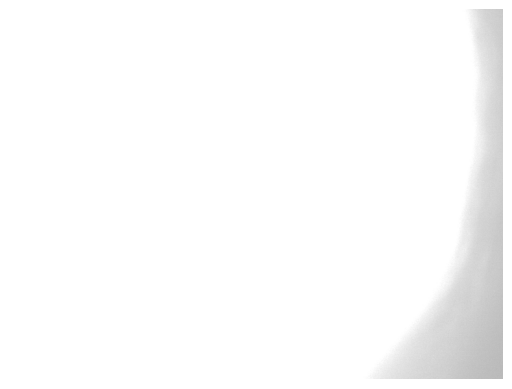

In [ ]:
# from PIL import Image
# import matplotlib.pyplot as plt

# # Open the .tif file
# img = Image.open('/content/calcium_video.tif')

# # Display the image
# plt.imshow(img)
# plt.axis('off')  # Hide axes
# plt.show()

In [20]:
# set path to video of the full field of view
input_tif_file_path_FOV = '/content/calcium_video.tif'
input_tif_file_path = '/content/caiman_video_trial_0.tif'

In [21]:
FOV = cm.load(input_tif_file_path_FOV) # load video with complete field of view (FOV)
ROI =  cm.load(input_tif_file_path)

In [ ]:
ROI.shape
# 500 frames

(500, 300, 400)

In [22]:
cmap = plt.get_cmap('hsv')

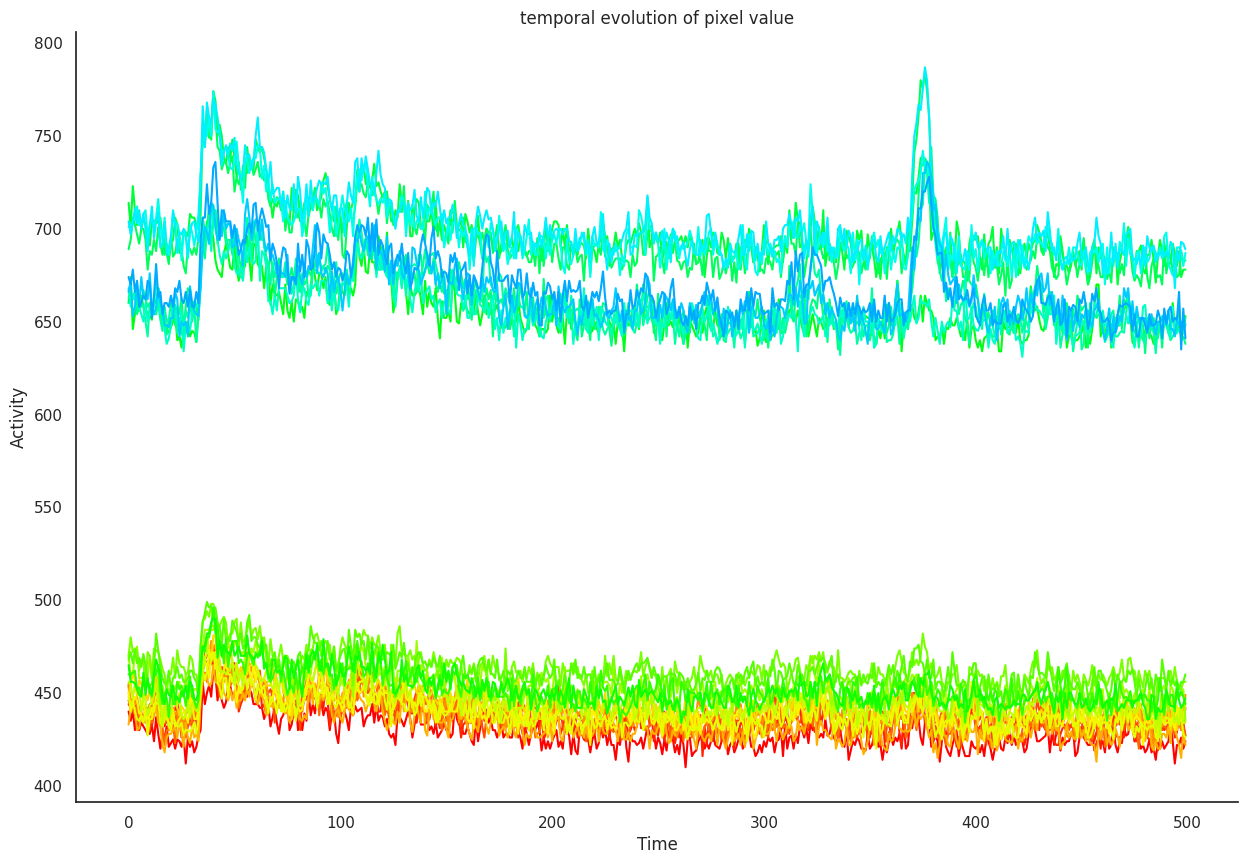

In [ ]:
# A
# pick some random pixels from the ROI and plot temporal evolution
# try to capture one with a spike

from random import randint

x_coords = [105, 0, 30]
y_coords = [100, 220, 40]

x_coords = [randint(0, 300-1) for i in range(5)]
y_coords = [randint(0, 400-1) for i in range(5)]

plt.figure(figsize = (15, 10))
index = 0
for x in x_coords:
  for y in y_coords:
    plt.plot(ROI[:, x, y], label = 'x:{} y:{}'.format(x, y), color=cmap(index*6))
    index += 1
plt.ylabel('Activity')
plt.xlabel('Time')
# plt.legend()
plt.title('temporal evolution of pixel value')
plt.show()

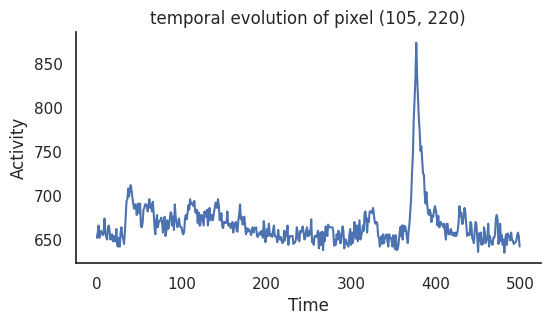

In [ ]:
plt.figure(figsize = (6, 3))
plt.plot(ROI[:, 105, 220])
plt.ylabel('Activity')
plt.xlabel('Time')
# plt.legend()
plt.title('temporal evolution of pixel (105, 220)')
plt.show()

# so we found one pixel that shows an active neuron

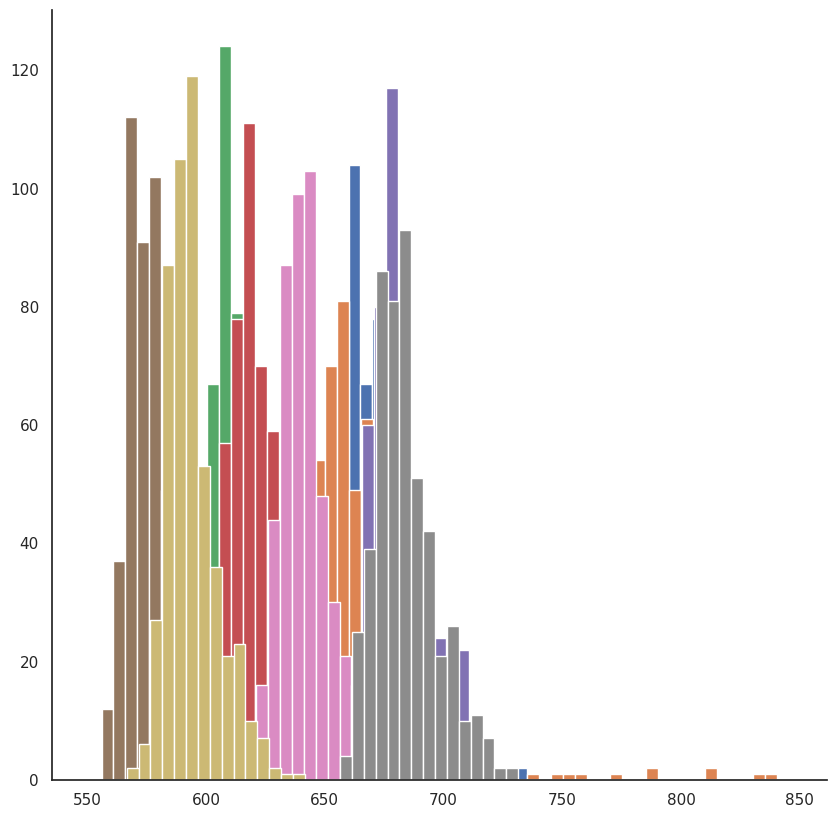

In [ ]:
# B
# plot histogram of pixel value

# only plot a few
x_coords = [105, 0, 30]
y_coords = [100, 220, 40]

bins = np.arange(550, 850, 5)

plt.figure(figsize = (10, 10))
shift = 0 # for better visibility when overlapping
for x in x_coords:
  for y in y_coords:
    plt.hist(ROI[:, x, y], label = 'x:{} y:{}'.format(x, y), bins = bins + shift)
    shift += 0.2

#plt.legend()
plt.show()

Although the mean of several neurons differs, as can be seen in the plot with many neurons, active neurons do get a wider range of 'activity', because the action potential spike gets them high. Inactive neurons have a histogram shaped kind of like a normal distribution, whereas active neurons wil have one more like this (like the orange one above): 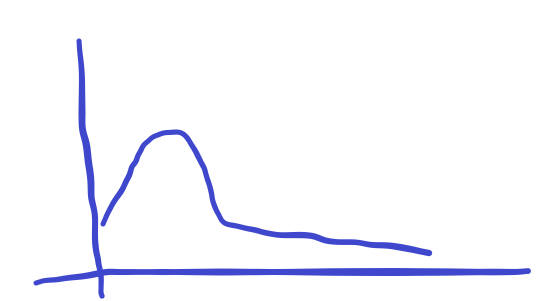

This is due to the small number of times within the spike where the 'activity' is relatively higher.

There is a lot of noise is the measurement, though eg. movement of the animal or 'bad' measurement (the camera is not very focussed). It would be bad practice to already extract data at this stage, when there is still so much noise. Also, inactive neurons should show the same average level of signal, which differs a lot now.

## Exercise 2: motion correction parameters
---

One parameter that impacts motion correction performance is the size of the spatial filter that is applyed to the video.

* Use the following function from CaImAn and plot the result of different space filtering applyed to a single frame of the video:from caiman.motion_correction import high_pass_filter_space

* How will this filtering affect the measure of crispness?

* Acording to Pnevmatikakis et al, which other factors are relevant for pw-rigid motion correction?

- Explore the impact of different parameters in the output of motion correction algorithm by measuring crispness in the correlation image of the final outcome. Particularly measure the effect of different spatial filter size by applying motion correction algorithm multiple times and computing the crispness of the output video.

- Display all crispness values for rigid and not rigid motion correction and plot them agains gSig_filters values.

- If possible, show the impact of the crispness value that comes from changing other relevant paraments.

*Note1: The is no need to save all the motion corrected movies, just save the cripsness values.*

*Note2: gSig_filters is an optional range of posible values, but if your computer gets to slow in the computation reduce the range.*


In [23]:
# motion correction with parametered spatial filter

from caiman.motion_correction import high_pass_filter_space

?high_pass_filter_space

# args are img_orig (wont change), gSig_filt and freq

In [24]:
original_movie = cm.load(input_tif_file_path)
# original_movie.shape

# test it on a few frames first, then on all later for the cripyness
test_single_frame1 = high_pass_filter_space(ROI[250,:,:], gSig_filt=(5, 5))
test_single_frame2 = high_pass_filter_space(ROI[280,:,:], gSig_filt=(5, 5))
test_single_frame3 = high_pass_filter_space(ROI[300,:,:], gSig_filt=(5, 5))

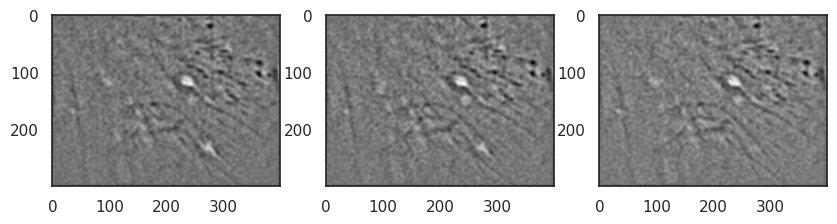

In [ ]:
figure,axes  = plt.subplots(1,3,figsize=(10,3))

axes[0].imshow(test_single_frame1, cmap='gray')
axes[1].imshow(test_single_frame2, cmap='gray')
axes[2].imshow(test_single_frame3, cmap='gray')

plt.show()

There are some small changes over time

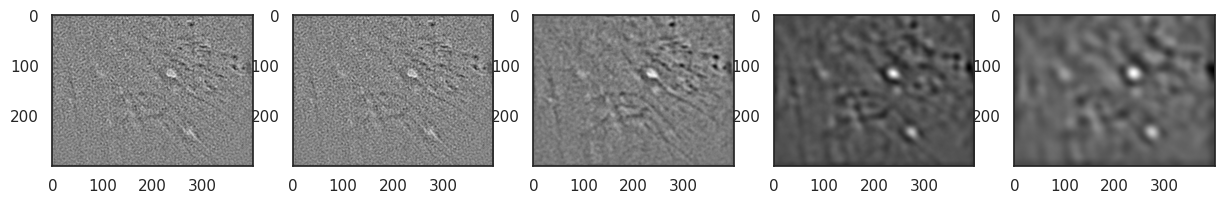

In [ ]:
# lets test a few gSig now

test_single_frame4 = high_pass_filter_space(ROI[250,:,:], gSig_filt=(5, 5))
test_single_frame5 = high_pass_filter_space(ROI[250,:,:], gSig_filt=(3, 3))
test_single_frame6 = high_pass_filter_space(ROI[250,:,:], gSig_filt=(3, 5))
test_single_frame7 = high_pass_filter_space(ROI[250,:,:], gSig_filt=(10, 8))
test_single_frame8 = high_pass_filter_space(ROI[250,:,:], gSig_filt=(15, 15))

figure,axes  = plt.subplots(1,5,figsize=(15,3))

axes[0].imshow(test_single_frame6, cmap='gray')
axes[1].imshow(test_single_frame5, cmap='gray')
axes[2].imshow(test_single_frame3, cmap='gray')
axes[3].imshow(test_single_frame7, cmap='gray')
axes[4].imshow(test_single_frame8, cmap='gray')


plt.show()

It seems that low gSig values make it very grainy and high values lead to blurry visuals, so the optimum for crispyness should be in between ((5, 5)).

Other factors are relevant for pw-rigid motion correction: patch size and its overlap (large enough to contain enough signal but not too large); the restricting of maximum shifts (can produce very different displacement vectors); interpolation

In [ ]:
# HP_all_5 = high_pass_filter_space(ROI[:,:,:], gSig_filt=(5, 5))
# HP_all_3 = high_pass_filter_space(ROI[:,:,:], gSig_filt=(3, 3))
# HP_all_10 = high_pass_filter_space(ROI[:,:,:], gSig_filt=(10, 10))

In [26]:
HP_all = high_pass_filter_space(ROI[:,:,:], gSig_filt=(3, 3))

In [ ]:
# run it three times for three gSig values, because it takes very long

# first for gSig = (5, 5)

In [28]:
HP = high_pass_filter_space(ROI[:,:,:], gSig_filt=(5, 5))

Now get effect on motion correction

In [30]:
# Define parameters for motion correction in a dictionary

parameters_motion_correction = { 'pw_rigid': True,       # flag for performing piecewise-rigid motion correction (otherwise just rigid)
                                'gSig_filt': (5, 5),     # size of high pass spatial filtering, used in 1p data
                                'max_shifts': (25, 25),  # maximum allowed rigid shift in pixels (view the movie to get a sense of motion)
                                'niter_rig': 1 ,
                                'strides': (48, 48),     # create a new patch every x pixels for pw-rigid correction
                                'overlaps': (96, 96),    # overlap between pathes (size of patch strides+overlaps)
                               'upsample_factor_grid': 1,
                                'num_frames_split': 80,  # length in frames of each chunk of the movie (to be processed in parallel)
                                'max_deviation_rigid': 15, # maximum deviation allowed for patch with respect to rigid shifts
                                'shifts_opencv': True,
                                'use_cuda': False,
                                'nonneg_movie': True,
                                'border_nan': 'copy'}

# We compute and store the minimum value of the movie, that the algorithm needs to make values all positive
original_movie = cm.load(input_tif_file_path)
parameters_motion_correction['min_mov'] = np.min(ROI)

# pass parameters to caiman object
opts = params.CNMFParams(params_dict = parameters_motion_correction)

In [ ]:
# #make directory to save motion corrected videos
# Path("data/motion_corrected").mkdir(parents=True, exist_ok=True)

# #create an object for motion correction
# mc = MotionCorrect(HP, dview = dview, **opts.get_group('motion'))
# # Perform rigid motion correction
# mc.motion_correct_rigid(save_movie = True, template = None)

# #perform non-rigid motion correction
# total_template_rig = mc.total_template_rig
# mc.motion_correct_pwrigid(save_movie=True, template = total_template_rig)
# fname_tot_els = mc.fname_tot_els[0]

# #reshape memmap files for source extraction
# m_els = cm.load(fname_tot_els)
# fname_tot_els  = m_els.save('motion_corrected_video.mmap',  order='C')
# Path(fname_tot_els).rename(f"data/motion_corrected/{fname_tot_els}")

# final_size = mc.total_template_els.shape
# winsize = 100
# swap_dim = False
# resize_fact_flow = .1    # downsample for computing ROF

# tmpl_orig, correlations_orig, flows_orig, norms_orig, crispness_orig = cm.motion_correction.compute_metrics_motion_correction(
#     input_tif_file_path, final_size[0], final_size[1], swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

# tmpl_rig, correlations_rig, flows_rig, norms_rig, crispness_rig = cm.motion_correction.compute_metrics_motion_correction(
#     mc.fname_tot_rig[0], final_size[0], final_size[1],
#     swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

# tmpl_els, correlations_els, flows_els, norms_els, crispness_els = cm.motion_correction.compute_metrics_motion_correction(
#     mc.fname_tot_els[0], final_size[0], final_size[1],
#     swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

In [34]:
mc.fname_tot_els

[None]

In [ ]:
dview.terminate() # Terminate any existing cluster

# Set up a new cluster
n_processes = psutil.cpu_count() # counts local cpus
cm.cluster.stop_server() #stop any already running clusters
c, dview, n_processes = cm.cluster.setup_cluster(backend='multiprocessing',
                                                 n_processes=n_processes,
                                                 single_thread=False)

# Define parameters for motion correction in a dictionary
parameters_motion_correction = { 'pw_rigid': True,       # flag for performing piecewise-rigid motion correction (otherwise just rigid)
                                'gSig_filt': (5, 5),     # size of high pass spatial filtering, used in 1p data
                                'max_shifts': (25, 25),  # maximum allowed rigid shift in pixels (view the movie to get a sense of motion)
                                'niter_rig': 1 ,
                                'strides': (48, 48),     # create a new patch every x pixels for pw-rigid correction
                                'overlaps': (96, 96),    # overlap between pathes (size of patch strides+overlaps)
                               'upsample_factor_grid': 1,
                                'num_frames_split': 80,  # length in frames of each chunk of the movie (to be processed in parallel)
                                'max_deviation_rigid': 15, # maximum deviation allowed for patch with respect to rigid shifts
                                'shifts_opencv': True,
                                'use_cuda': False,
                                'nonneg_movie': True,
                                'border_nan': 'copy'}

# We compute and store the minimum value of the movie, that the algorithm needs to make values all positive
original_movie = cm.load(input_tif_file_path)
# Access the array data using .copy() before calculating the minimum
parameters_motion_correction['min_mov'] = np.min(ROI.copy())

# pass parameters to caiman object
opts = params.CNMFParams(params_dict = parameters_motion_correction)

#make directory to save motion corrected videos
Path("data/motion_corrected").mkdir(parents=True, exist_ok=True)

#create an object for motion correction
mc = MotionCorrect(HP, dview = dview, **opts.get_group('motion'))
# Perform rigid motion correction
mc.motion_correct_rigid(save_movie = True, template = None)

#perform non-rigid motion correction
total_template_rig = mc.total_template_rig
mc.motion_correct_pwrigid(save_movie=True, template = total_template_rig)
fname_tot_els = mc.fname_tot_els[0]
fname_tot_rig = mc.fname_tot_rig[0]

#reshape memmap files for source extraction
m_els = cm.load(fname_tot_els)
saved_fname_tot_els  = m_els.save('motion_corrected_video.mmap',  order='C')

# Construct the correct destination path
destination_path = Path("data/motion_corrected") / Path(saved_fname_tot_els).name

# Rename/move the file
Path(saved_fname_tot_els).rename(destination_path)


final_size = mc.total_template_els.shape
winsize = 100
swap_dim = False
resize_fact_flow = .1    # downsample for computing ROF

tmpl_orig, correlations_orig, flows_orig, norms_orig, crispness_orig = cm.motion_correction.compute_metrics_motion_correction(
    input_tif_file_path, final_size[0], final_size[1], swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

tmpl_rig, correlations_rig, flows_rig, norms_rig, crispness_rig = cm.motion_correction.compute_metrics_motion_correction(
    mc.fname_tot_rig[0], final_size[0], final_size[1],
    swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

tmpl_els, correlations_els, flows_els, norms_els, crispness_els = cm.motion_correction.compute_metrics_motion_correction(
    mc.fname_tot_els[0], final_size[0], final_size[1],
    swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

In [60]:
print('\ngSig = (5, 5)')
print('Crispness original: '+ str(int(crispness_orig)))
print('Crispness rigid: '+ str(int(crispness_rig)))
print('Crispness elastic: '+ str(int(crispness_els)))


gSig = (5, 5)
Crispness original: 1059
Crispness rigid: 25
Crispness elastic: 25


Do it again for two other gSig values. I use all cells again because using loops broke my laptop :(

In [61]:
HP = high_pass_filter_space(ROI[:,:,:], gSig_filt=(3, 3))

In [63]:
# code made with help from gemini

dview.terminate() # Terminate any existing cluster

# Set up a new cluster
n_processes = psutil.cpu_count() # counts local cpus
cm.cluster.stop_server() #stop any already running clusters
c, dview, n_processes = cm.cluster.setup_cluster(backend='multiprocessing',
                                                 n_processes=n_processes,
                                                 single_thread=False)

# Define parameters for motion correction in a dictionary
parameters_motion_correction = { 'pw_rigid': True,       # flag for performing piecewise-rigid motion correction (otherwise just rigid)
                                'gSig_filt': (3, 3),     # size of high pass spatial filtering, used in 1p data
                                'max_shifts': (25, 25),  # maximum allowed rigid shift in pixels (view the movie to get a sense of motion)
                                'niter_rig': 1 ,
                                'strides': (48, 48),     # create a new patch every x pixels for pw-rigid correction
                                'overlaps': (96, 96),    # overlap between pathes (size of patch strides+overlaps)
                               'upsample_factor_grid': 1,
                                'num_frames_split': 80,  # length in frames of each chunk of the movie (to be processed in parallel)
                                'max_deviation_rigid': 15, # maximum deviation allowed for patch with respect to rigid shifts
                                'shifts_opencv': True,
                                'use_cuda': False,
                                'nonneg_movie': True,
                                'border_nan': 'copy'}

# We compute and store the minimum value of the movie, that the algorithm needs to make values all positive
original_movie = cm.load(input_tif_file_path)
# Access the array data using .copy() before calculating the minimum
parameters_motion_correction['min_mov'] = np.min(ROI.copy())

# pass parameters to caiman object
opts = params.CNMFParams(params_dict = parameters_motion_correction)

#make directory to save motion corrected videos
Path("data/motion_corrected").mkdir(parents=True, exist_ok=True)

#create an object for motion correction
mc = MotionCorrect(HP, dview = dview, **opts.get_group('motion'))
# Perform rigid motion correction
mc.motion_correct_rigid(save_movie = True, template = None)

#perform non-rigid motion correction
total_template_rig = mc.total_template_rig
mc.motion_correct_pwrigid(save_movie=True, template = total_template_rig)
fname_tot_els = mc.fname_tot_els[0]
fname_tot_rig = mc.fname_tot_rig[0]

#reshape memmap files for source extraction
m_els = cm.load(fname_tot_els)
saved_fname_tot_els  = m_els.save('motion_corrected_video.mmap',  order='C')

# Construct the correct destination path
destination_path = Path("data/motion_corrected") / Path(saved_fname_tot_els).name

# Rename/move the file
Path(saved_fname_tot_els).rename(destination_path)


final_size = mc.total_template_els.shape
winsize = 100
swap_dim = False
resize_fact_flow = .1    # downsample for computing ROF

tmpl_orig, correlations_orig, flows_orig, norms_orig, crispness_orig = cm.motion_correction.compute_metrics_motion_correction(
    input_tif_file_path, final_size[0], final_size[1], swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

tmpl_rig, correlations_rig, flows_rig, norms_rig, crispness_rig = cm.motion_correction.compute_metrics_motion_correction(
    mc.fname_tot_rig[0], final_size[0], final_size[1],
    swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

tmpl_els, correlations_els, flows_els, norms_els, crispness_els = cm.motion_correction.compute_metrics_motion_correction(
    mc.fname_tot_els[0], final_size[0], final_size[1],
    swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

In [64]:
print('\ngSig = (3, 3)')
print('Crispness original: '+ str(int(crispness_orig)))
print('Crispness rigid: '+ str(int(crispness_rig)))
print('Crispness elastic: '+ str(int(crispness_els)))


gSig = (3, 3)
Crispness original: 1059
Crispness rigid: 25
Crispness elastic: 25


In [65]:
HP = high_pass_filter_space(ROI[:,:,:], gSig_filt=(9, 9))

In [66]:
dview.terminate() # Terminate any existing cluster

# Set up a new cluster
n_processes = psutil.cpu_count() # counts local cpus
cm.cluster.stop_server() #stop any already running clusters
c, dview, n_processes = cm.cluster.setup_cluster(backend='multiprocessing',
                                                 n_processes=n_processes,
                                                 single_thread=False)

# Define parameters for motion correction in a dictionary
parameters_motion_correction = { 'pw_rigid': True,       # flag for performing piecewise-rigid motion correction (otherwise just rigid)
                                'gSig_filt': (9, 9),     # size of high pass spatial filtering, used in 1p data
                                'max_shifts': (25, 25),  # maximum allowed rigid shift in pixels (view the movie to get a sense of motion)
                                'niter_rig': 1 ,
                                'strides': (48, 48),     # create a new patch every x pixels for pw-rigid correction
                                'overlaps': (96, 96),    # overlap between pathes (size of patch strides+overlaps)
                               'upsample_factor_grid': 1,
                                'num_frames_split': 80,  # length in frames of each chunk of the movie (to be processed in parallel)
                                'max_deviation_rigid': 15, # maximum deviation allowed for patch with respect to rigid shifts
                                'shifts_opencv': True,
                                'use_cuda': False,
                                'nonneg_movie': True,
                                'border_nan': 'copy'}

# We compute and store the minimum value of the movie, that the algorithm needs to make values all positive
original_movie = cm.load(input_tif_file_path)
# Access the array data using .copy() before calculating the minimum
parameters_motion_correction['min_mov'] = np.min(ROI.copy())

# pass parameters to caiman object
opts = params.CNMFParams(params_dict = parameters_motion_correction)

#make directory to save motion corrected videos
Path("data/motion_corrected").mkdir(parents=True, exist_ok=True)

#create an object for motion correction
mc = MotionCorrect(HP, dview = dview, **opts.get_group('motion'))
# Perform rigid motion correction
mc.motion_correct_rigid(save_movie = True, template = None)

#perform non-rigid motion correction
total_template_rig = mc.total_template_rig
mc.motion_correct_pwrigid(save_movie=True, template = total_template_rig)
fname_tot_els = mc.fname_tot_els[0]
fname_tot_rig = mc.fname_tot_rig[0]

#reshape memmap files for source extraction
m_els = cm.load(fname_tot_els)
saved_fname_tot_els  = m_els.save('motion_corrected_video.mmap',  order='C')

# Construct the correct destination path
destination_path = Path("data/motion_corrected") / Path(saved_fname_tot_els).name

# Rename/move the file
Path(saved_fname_tot_els).rename(destination_path)


final_size = mc.total_template_els.shape
winsize = 100
swap_dim = False
resize_fact_flow = .1    # downsample for computing ROF

tmpl_orig, correlations_orig, flows_orig, norms_orig, crispness_orig = cm.motion_correction.compute_metrics_motion_correction(
    input_tif_file_path, final_size[0], final_size[1], swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

tmpl_rig, correlations_rig, flows_rig, norms_rig, crispness_rig = cm.motion_correction.compute_metrics_motion_correction(
    mc.fname_tot_rig[0], final_size[0], final_size[1],
    swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

tmpl_els, correlations_els, flows_els, norms_els, crispness_els = cm.motion_correction.compute_metrics_motion_correction(
    mc.fname_tot_els[0], final_size[0], final_size[1],
    swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

In [67]:
print('\ngSig = (9, 9)')
print('Crispness original: '+ str(int(crispness_orig)))
print('Crispness rigid: '+ str(int(crispness_rig)))
print('Crispness elastic: '+ str(int(crispness_els)))


gSig = (9, 9)
Crispness original: 1059
Crispness rigid: 36
Crispness elastic: 36


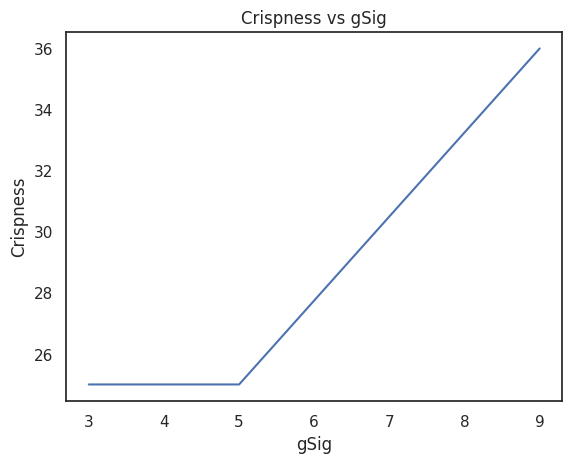

In [68]:
# plot crispiness values against gSig

gSigs = [3, 5, 9]
found_cor_values = [25, 25, 36]

plt.plot(gSigs, found_cor_values)
plt.xlabel('gSig')
plt.ylabel('Crispness')
plt.title('Crispness vs gSig')
plt.show()

It seems that higher gSig values lead to larger crispyness.

In [ ]:
# dview.terminate()

In [ ]:
# This cell is no longer needed as crispness calculation is integrated into the loop in the previous cell.
# I will keep it here but it can be ignored or deleted by the user.

# final_size = mc.total_template_els.shape
# winsize = 100
# swap_dim = False
# resize_fact_flow = .1    # downsample for computing ROF

# tmpl_orig, correlations_orig, flows_orig, norms_orig, crispness_orig = cm.motion_correction.compute_metrics_motion_correction(
#     input_tif_file_path, final_size[0], final_size[1], swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

# tmpl_rig, correlations_rig, flows_rig, norms_rig, crispness_rig = cm.motion_correction.compute_metrics_motion_correction(
#     mc.fname_tot_rig[0], final_size[0], final_size[1],
#     swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

# tmpl_els, correlations_els, flows_els, norms_els, crispness_els = cm.motion_correction.compute_metrics_motion_correction(
#     mc.fname_tot_els[0], final_size[0], final_size[1],
#     swap_dim, winsize=winsize, play_flow=False, resize_fact_flow=resize_fact_flow)

In [ ]:
# #crispness calculation
# print('\ngSig = (3, 3)')
# print('Crispness original: '+ str(int(crispness_orig)))
# print('Crispness rigid: '+ str(int(crispness_rig)))
# print('Crispness elastic: '+ str(int(crispness_els)))

In [ ]:
# #crispness calculation
# print('\ngSig = (5, 5)')
# print('Crispness original: '+ str(int(crispness_orig)))
# print('Crispness rigid: '+ str(int(crispness_rig)))
# print('Crispness elastic: '+ str(int(crispness_els)))


gSig = (5, 5)
Crispness original: 1059
Crispness rigid: 25
Crispness elastic: 25


I wont run more because this takes extremely long already.

## Exercise 3: Source extraction parameters
---

* For a fixed minimum correlation value (ie 0.6) select a range of possible PNR minimun values and study the impact of those in the final source extraction output.

* For a fixed value of PNR (ie 6) select a range of minimum correlation valur and study the impact of those in the final source extraction output.

* How do these paramenters affect the spatial sparcity of the output? Which set of parameter selection procedes the higher number of neurons? Is maximal number of neurons always better? Why?  

* Generate a plot of number of neurons vs PNR (or min corr value) to show how these parameters affect the source extracted signals.

* Are the temporal traces affected by these parameters?

* For different PNR and minimum correlation value plot the correlation image and the selected cells.

In [69]:
# 3
# Peak to Noise Ratio (PNR): computes te the peak to noise (temporal standard deviation) ratio pixel by pixe

min_cor_val = 0.6

In [49]:
# create dictionary with source extraction parameters

parameters_source_extraction ={ 'fr': 10,               # movie frame rate
                               'decay_time': 0.1,       # length of a typical transient in seconds
                               'min_corr': min_cor_val,   # min peak value from correlation image
                               'min_pnr': 7,     # min peak to noise ration from PNR image
                               'p': 1,                # order of the autoregressive system
                               'K': None,              # upper bound on number of components per patch, in general None
                               'gSig': (4, 4),         # gaussian width of a 2D gaussian kernel, which approximates a neuron
                               'gSiz': (17, 17),       # average diameter of a neuron, in general 4*gSig+1
                               'ring_size_factor': 1.4, # radius of ring is gSiz*ring_size_factor
                               'merge_thr': 0.7, 'rf': 60,
                               'stride': 30, 'tsub': 1, 'ssub': 2, 'p_tsub': 1, 'p_ssub': 2, 'low_rank_background': None,
                               'nb': 0, 'nb_patch': 0, 'ssub_B': 2, 'init_iter': 2,
                               'method_init': 'corr_pnr', 'method_deconvolution': 'oasis',
                               'update_background_components': True,
                               'center_psf': True, 'border_pix': 0, 'normalize_init': False,
                               'del_duplicates': True, 'only_init': True}
# create caiman parameters objects
opts = params.CNMFParams(params_dict=parameters_source_extraction)

In [71]:
original_movie = cm.load(input_tif_file_path)
parameters_motion_correction['min_mov'] = np.min(original_movie)

# pass parameters to caiman object
opts = params.CNMFParams(params_dict = parameters_motion_correction)

In [50]:
cnmf_object = cnmf.CNMF(n_processes=n_processes, dview=dview, params=opts)
cnmf_object.fit(images)

NameError: name 'images' is not defined

In [44]:
?cm.summary_images.correlation_pnr

In [ ]:
# no parameter for correlation values, only Y, gSig,, center_psf, swap_dim

In [46]:
# load movie and compute mean imges with caiman functions
original_movie = cm.load(input_tif_file_path)
mean_image = cm.summary_images.mean_image(input_tif_file_path)
correlation_image,pnr_image = cm.summary_images.correlation_pnr(original_movie,
                                                                swap_dim=False)

In [47]:
pnr_image.shape

(300, 400)

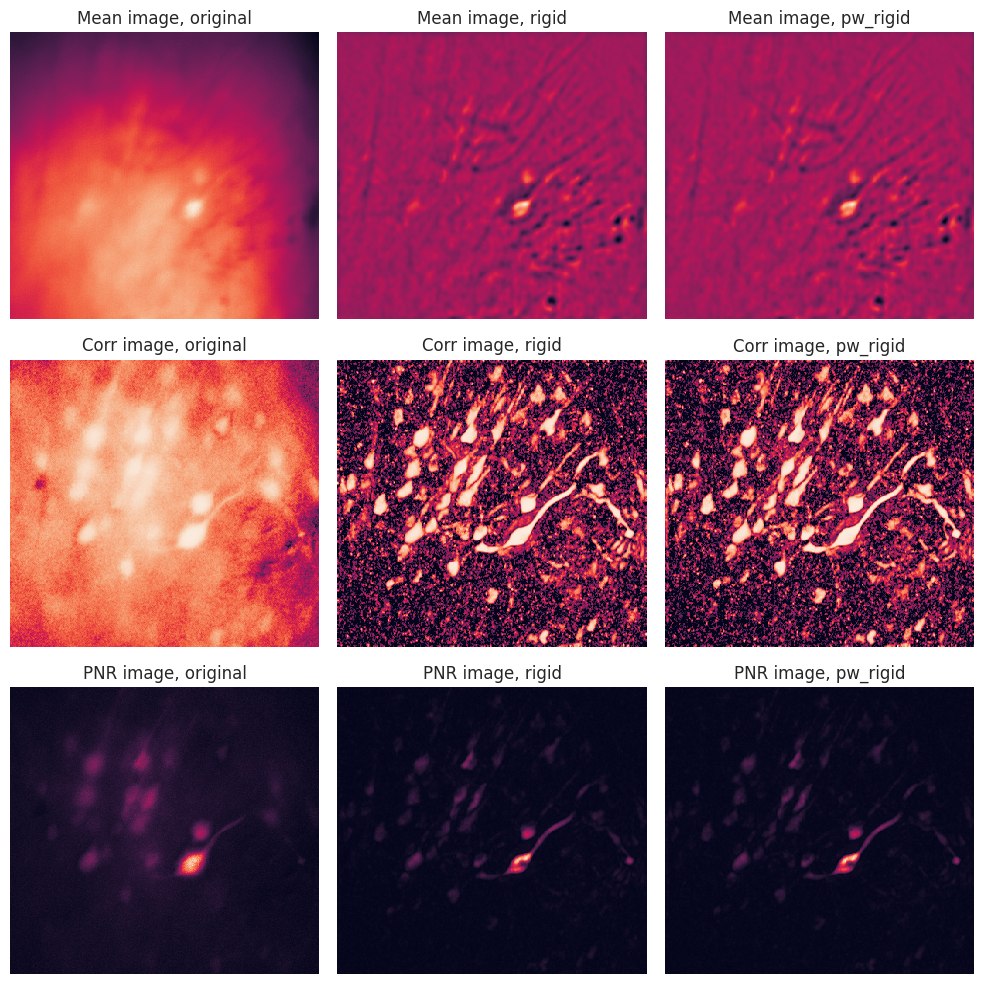

In [48]:
figure,axes  = plt.subplots(3,3,figsize=(10,10))
movies = {'original':input_tif_file_path,
          'rigid':mc.fname_tot_rig[0],
          'pw_rigid':mc.fname_tot_els[0]}

for col,movie in enumerate(movies.keys()):

    movie_array = cm.load(movies[movie])
    mean_image = cm.summary_images.mean_image(movies[movie])
    correlation_image,pnr_image = cm.summary_images.correlation_pnr(movie_array,swap_dim=False)

    axes[0,col].set_title(f'Mean image, {movie}')
    axes[0,col].pcolormesh(mean_image)
    axes[0,col].axis('off')


    axes[1,col].set_title(f'Corr image, {movie}')
    axes[1,col].pcolormesh(correlation_image)
    axes[1,col].axis('off')


    axes[2,col].set_title(f'PNR image, {movie}')
    axes[2,col].pcolormesh(pnr_image)
    axes[2,col].axis('off')

plt.tight_layout()